In [ ]:
# Parenteses e conchetes
# Em resumo, parênteses são usados principalmente para chamar funções, agrupar expressões matemáticas e criar tuplas, 
#enquanto colchetes são usados para acessar e manipular elementos em sequências como listas e strings, fatiar sequências e criar listas e dicionários

In [5]:
import pandas as pd
import numpy as np

# Gerar nomes de bairros aleatórios de São Paulo, por ser uma lista usamos conchetes
# random.choice escolhe aleatoriamente um elemento dentro de uma lista pré-definida e caso eu queira uma lista, posso colocar quantos elementos eu quero
bairros = ['Moema', 'Pinheiros', 'Vila Mariana', 'Itaim Bibi', 'Perdizes', 'Vila Madalena', 'Morumbi', 'Brooklin', 'Jardins', 'Santana']
bairros_aleatorios = np.random.choice(bairros, 200)

# Gerar valores de aluguel aleatórios entre R$ 1000 e R$ 10000, o número finaliza com 10001, pois o último número não entra [1000,10001[
valores_aluguel = np.random.randint(1000, 10001, 200)

# Gerar números de quartos aleatórios entre 1 e 5, o número finaliza com 6, pois o último número não entra [1,6[
num_quartos = np.random.randint(1, 6, 200)

# Gerar números de banheiros aleatórios entre 1 e 3, o número finaliza com 4, pois o último número não entra [1,4[
num_banheiros = np.random.randint(1, 4, 200)

# Gerar se tem garagem ou não aleatoriamente, diferente dos bairros que coloquei em uma lista apartada, como são poucos elementos eu coloquei dentro da função
garagem = np.random.choice(['Sim', 'Não'], 200)

# Criar DataFrame com os dados gerados
## Primeiro eu concateno todas os dados, e dou uma nomenclatura para a coluna
dados = {
    'Bairro': bairros_aleatorios,
    'Price': valores_aluguel,
    'Quartos': num_quartos,
    'Banheiros': num_banheiros,
    'Garagem': garagem
}
## Transformo esses dados em um Dataframe
casas_para_alugar = pd.DataFrame(dados)

# Salvar DataFrame em um arquivo CSV
casas_para_alugar.to_csv('casas_para_alugar_sp.csv', index=False)

print("Lista de casas para alugar em São Paulo gerada com sucesso e salva em 'casas_para_alugar_sp.csv'")

Lista de casas para alugar em São Paulo gerada com sucesso e salva em 'casas_para_alugar_sp.csv'


In [6]:
def limpa_preco(linha):
    linha['Garagem'] = linha['Garagem'].replace('Sim','True') 
    linha['Garagem'] = linha['Garagem'].replace('Não','False') ## pegar cada valor de linha no campo price e subistituir o valor r$ por vazio
    return casas_para_alugar
casas_para_alugar = limpa_preco(casas_para_alugar) ## Substituir a base de dados para a nova
casas_para_alugar.head()

,Bairro,Price,Quartos,Banheiros,Garagem
0,Vila Madalena,9913,4,3,True
1,Vila Mariana,1028,4,1,False
2,Moema,5454,4,3,False
3,Brooklin,6829,1,3,True
4,Vila Mariana,2581,4,2,False


In [7]:
valor_max_aluguel = 10000
taxa_do_aluguel = 200
preco = 0
valor_imovel =[]

def ajusta_alugueis(casas_para_alugar):
    valor_imovel = []
    ### Cada elemento da coluna Pricce se denomina preco agora
    for preco in casas_para_alugar['Price']: 
        ### para cada preco ele avalia se ele é maior ou não
        if preco < valor_max_aluguel: 
            ### Adiciona no campo valor_imovel o valor do preco * taxa
            valor_imovel.append(preco * taxa_do_aluguel) 
        else:
            ### Caso não satisfaça ele adiciona o preco cru 
            valor_imovel.append(preco) 
    ### No final retorna todos os campos
    return valor_imovel 
# Aqui iguala o valor_imovel a função criada
valor_imovel = ajusta_alugueis(casas_para_alugar)  
# cria um campo de dados onde o valor da coluna é valor_imovel
dados = {
    'valor_imovel':valor_imovel} 
# transforma em um dataframe
valor_imovel = pd.DataFrame(dados)
#head o data frame
valor_imovel.head()

,valor_imovel
0,1982600
1,205600
2,1090800
3,1365800
4,516200


In [8]:
# Junta os dados de ambas ambos em coluna ou do lado do outro, caso fosse 0 seria dados empilhados linha
dt_concatenar = pd.concat([casas_para_alugar,valor_imovel], axis=1)

In [9]:
dt_concatenar.head()

,Bairro,Price,Quartos,Banheiros,Garagem,valor_imovel
0,Vila Madalena,9913,4,3,True,1982600
1,Vila Mariana,1028,4,1,False,205600
2,Moema,5454,4,3,False,1090800
3,Brooklin,6829,1,3,True,1365800
4,Vila Mariana,2581,4,2,False,516200


In [10]:
# Pega a base final e faz a agrupação por bairos e agrega os valores para definir, média, mediana, max, min e count de linhas
resultado_group = dt_concatenar.groupby(['Bairro'])['Price'].agg(['count','mean','median','max','min'])
# Ordernar do maior para o menor de count depois média
resultado_group.sort_values(by=['count', 'mean'], ascending=False)

,count,mean,median,max,min
Bairro,,,,,
Brooklin,23,5059.043478,4999.0,9876,1131
Itaim Bibi,22,5439.227273,6218.0,9682,1108
Vila Mariana,22,5233.409091,4665.5,9904,1028
Vila Madalena,21,6528.000000,6876.0,9981,1129
Perdizes,21,5414.285714,5494.0,9045,1017
Pinheiros,20,6387.800000,6433.0,9960,1989
Morumbi,19,4242.368421,3628.0,8444,1018
Santana,18,5545.111111,5912.5,9982,1375
Moema,18,5150.111111,5521.5,9150,1024


In [11]:
print(bairros_aleatorios)

['Vila Madalena' 'Vila Mariana' 'Moema' 'Brooklin' 'Vila Mariana'
 'Brooklin' 'Vila Mariana' 'Perdizes' 'Brooklin' 'Vila Madalena' 'Moema'
 'Perdizes' 'Vila Mariana' 'Vila Madalena' 'Vila Madalena' 'Santana'
 'Perdizes' 'Jardins' 'Brooklin' 'Vila Mariana' 'Vila Madalena' 'Morumbi'
 'Perdizes' 'Morumbi' 'Jardins' 'Itaim Bibi' 'Vila Mariana'
 'Vila Madalena' 'Santana' 'Moema' 'Moema' 'Brooklin' 'Vila Mariana'
 'Perdizes' 'Vila Madalena' 'Brooklin' 'Itaim Bibi' 'Santana' 'Jardins'
 'Brooklin' 'Vila Madalena' 'Vila Mariana' 'Moema' 'Itaim Bibi' 'Jardins'
 'Perdizes' 'Moema' 'Perdizes' 'Brooklin' 'Jardins' 'Morumbi'
 'Vila Mariana' 'Jardins' 'Jardins' 'Itaim Bibi' 'Perdizes' 'Brooklin'
 'Santana' 'Santana' 'Santana' 'Itaim Bibi' 'Itaim Bibi' 'Perdizes'
 'Itaim Bibi' 'Morumbi' 'Vila Madalena' 'Itaim Bibi' 'Brooklin' 'Morumbi'
 'Jardins' 'Vila Mariana' 'Itaim Bibi' 'Itaim Bibi' 'Brooklin'
 'Vila Madalena' 'Brooklin' 'Pinheiros' 'Perdizes' 'Santana' 'Moema'
 'Pinheiros' 'Moema' 'Morumbi' 'Pinh

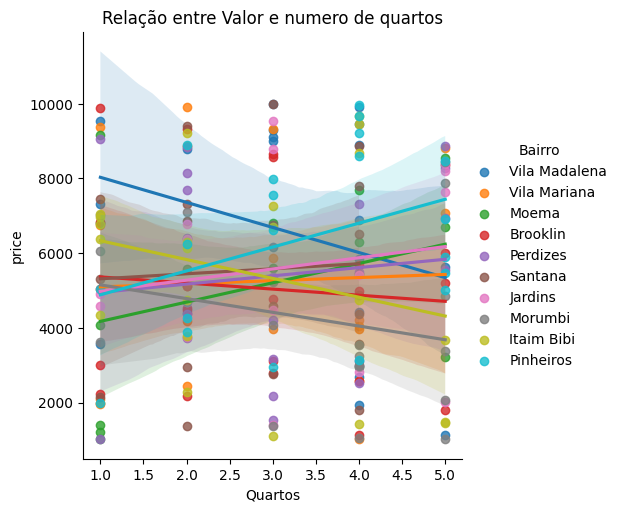

In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar o DataFrame para remover valores nulos em 'age' e 'fare'
casas_para_alugar = casas_para_alugar.dropna(subset=['Quartos', 'Price'])

# Criar um gráfico de regressão linear/ Combinação dos gráficos scatterplot e linear
sns.lmplot(x='Quartos', y='Price', data=casas_para_alugar, hue = 'Bairro' )
           ##, data=titanic, hue = 'sex'

# Adicionar título e rótulos aos eixos
plt.title('Relação entre Valor e numero de quartos')
plt.xlabel('Quartos')
plt.ylabel('price')

# Mostrar o gráfico
plt.show()